# COGS 108 - Final Project 

# Overview

Many people are familiar with the phrase "women and children first" from the James Cameron film, Titanic. To confirm whether this trope actually existed in real life, available passenger data from the Titanic was cleaned and analyzed. The chi-square test was then used to determine the effect of sex and age on the survivability of passengers. The following statistical analysis revealed that both women and children were significantly more likely to obtain a spot on a lifeboat and thus survive.

# Names

- Sean Wong

# Group Members IDs

- A12849342

# Research Question

Did women and children get priority over men in terms of getting on a lifeboat during the Titanic disaster?

## Background and Prior Work

A famous saying regarding the tragedy of the Titanic is "women and children first". However, this saying came almost sixty years before the sinking of the Titanic. In fact, "women and children first" was an order that came from the captain of the HMS Birkenhead when disaster struck and the HMS Birkenhead crashed into rocks [1]. British society at the time was built upon chivalry, which lead to men either sacrificing themselves to maintain their honor or living in shame for the rest of their lives. This attitude that men had lasted well into the twentieth century where we can find the sinking of the Titanic. A famous example of this is J. Bruce Ismay, whose company had built the Titanic and who survived the sinking of the Titanic by boarding a lifeboat. As a survivor and builder of the Titanic, Ismay was detested because society felt that he should have risked his life to save others [2]. Due to the nature of the Titanic as a cultural phenomena, there are many studies that have analyzed the survival rate of a passenger based on certain qualities of the passenger. One study in particular linked lower social class to a lower survival rate [3].

# Hypothesis


Female passengers and and child passengers boarding the vessel known as the RMS Titanic were more likely to survive the sinking of the ship than their adult male counterparts. The reason this correlation could be the case is due to the chivalric behavior expected from the men of this time period. This expectation would cause men to sacrifice themselves to save women and children, allowing them to retain their honor in death.

# Dataset(s)

- Dataset Name: titanic.csv
- Link to the dataset: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv (can also be loaded from the seaborn module)
- Number of observations: 892

The titanic dataset contains 892 passengers of the 2224 passengers who boarded the Titanic. The dataset contains information about passengers such as age, sex, and ticket class.

# Setup

In [91]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

#load in the dataset
df = sb.load_dataset("titanic")

# Data Cleaning

Some passengers within the titanic dataset were missing key data. Key data were those data that were necessary for analysis, such as the passenger's sex or age. If passengers were missing such data, their data were excluded from analysis.

In [43]:
#drop rows that are missing key data
df = df.dropna(subset=['survived','pclass','sex','age'])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [44]:
#total number of valid passengers
nTotal = df.shape[0]

#population that is either female or male
nMale = sum(df['sex'] == 'male')
nFemale = sum(df['sex'] == 'female')
pFemale = nFemale / nTotal
pMale = nMale / nTotal

#population that is either first, second, or third class
nFirst = sum(df['pclass'] == 1)
nSecond = sum(df['pclass'] == 2)
nThird = sum(df['pclass'] == 3)
pFirst = nFirst / nTotal
pSecond = nSecond / nTotal
pThird = nThird / nTotal

#number of children versus adults
#legal age of an adult in Britain, where Titanic set sail, 
#in 1912, when Titanic set sail
child = 16

#population that are either adults or children
nChildren = sum(df['age'] < 16)
nAdult = nTotal - nChildren
pChildren = nChildren / nTotal
pAdult = nAdult / nTotal

Text(0, 0.5, 'Number')

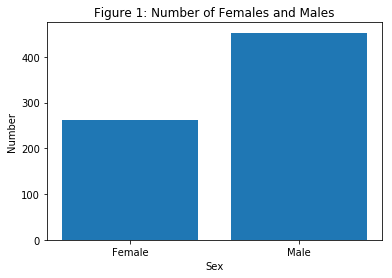

In [87]:
plt.bar(x = ["Female", "Male"], height = [nFemale, nMale])
plt.title("Figure 1: Number of Females and Males")
plt.xlabel("Sex")
plt.ylabel("Number")

Figure 1 above is a graphical representation of the available Titanic population that were either female or male. As shown, males comprise a majority of the Titanic population compared to females. This disparity will need to be accounted for in the analysis.

Text(3.8, 0.5, 'Ticket cost')

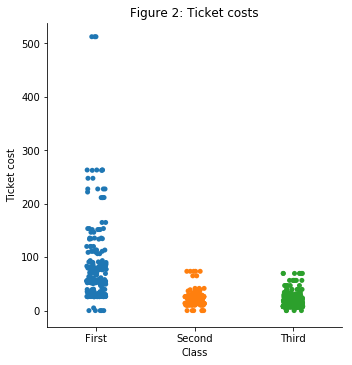

In [88]:
sb.catplot("class", "fare", data=df)
plt.title("Figure 2: Ticket costs")
plt.xlabel("Class")
plt.ylabel("Ticket cost")

Figure 2 above shows the cost for first, second, and third class tickets. Second class tickets are slightly more expensive than third class tickets. First class tickets are several times more expensive than either second or third class tickets.

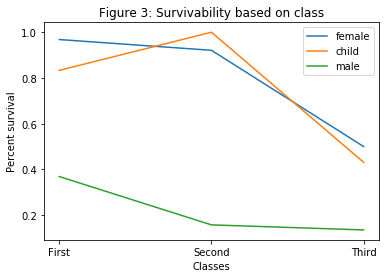

In [89]:
firstFemale = sum((df['sex'] == 'female') & (df['survived'] == 1)
                  & (df['class'] == 'First'))/sum((df['sex'] ==
                    'female') & (df['class'] == 'First'))
secondFemale = sum((df['sex'] == 'female') & (df['survived'] == 1)
                   & (df['class'] == 'Second'))/sum((df['sex'] ==
                    'female') & (df['class'] == 'Second'))
thirdFemale = sum((df['sex'] == 'female') & (df['survived'] == 1)
                  & (df['class'] == 'Third'))/sum((df['sex'] ==
                    'female') & (df['class'] == 'Third'))

firstMale = sum((df['sex'] == 'male') & (df['survived'] == 1)
                & (df['class'] == 'First'))/sum((df['sex'] ==
                    'male') & (df['class'] == 'First'))
secondMale = sum((df['sex'] == 'male') & (df['survived'] == 1)
                 & (df['class'] == 'Second'))/sum((df['sex'] ==
                    'male') & (df['class'] == 'Second'))
thirdMale = sum((df['sex'] == 'male') & (df['survived'] == 1)
                & (df['class'] == 'Third'))/sum((df['sex'] ==
                    'male') & (df['class'] == 'Third'))

firstChild = sum((df['age'] < 16) & (df['survived'] == 1)
                 & (df['class'] == 'First'))/sum((df['age']
                    < 16) & (df['class'] == 'First'))
secondChild = sum((df['age'] < 16) & (df['survived'] == 1)
                  & (df['class'] == 'Second'))/sum((df['age']
                    < 16) & (df['class'] == 'Second'))
thirdChild = sum((df['age'] < 16) & (df['survived'] == 1)
                 & (df['class'] == 'Third'))/sum((df['age']
                    < 16) & (df['class'] == 'Third'))

femaleData = [firstFemale, secondFemale, thirdFemale]
maleData = [firstMale, secondMale, thirdMale]
childData = [firstChild, secondChild, thirdChild]
classes = ["First", "Second", "Third"]

fig, ax = plt.subplots()
plt.title("Figure 3: Survivability based on class")
plt.xlabel("Classes")
plt.ylabel("Percent survival")
ax.plot(classes, femaleData, label="female")
ax.plot(classes, childData, label="child")
ax.plot(classes, maleData, label="male")
ax.legend()

plt.show()

Figure 3 shows the survival rates of females, children, and males based on what class they were in. Men had the worst survival rate even when compared to children and women in third class. There is also a decline in survivability from first to third class observed in women and men.

Both lines of code below utilize the "chisquare" function from the scipy module. The chi square test is a statistical test that determines whether two groups are statistically different. Because I want to answer the question of whether women and children got priority over men, I first total the number of women, men, and children who have not survived the titanic. The number of women, men, and children who died are the observed values. Next, I calculate the expected values by summing up the total number of dead and multiplying by the proportion of the population that were either women, men, or children. The reason for this is that if neither sex or age is a factor, then the number of women and men or children and men that are dead should be the same once normalized for the number of women, men, or children. Then, using the chi square test, I compare the number of women dead to the number of men dead and the number of children dead to the number of men dead.

In [126]:
#1
fDead = sum((df['sex'] == 'female') & (df['survived'] == 0))
mDead = sum((df['sex'] == 'male') & (df['survived'] == 0))
cDead = sum((df['age'] < 16) & (df['survived'] == 0))

#2
nTotalDead = sum(df['survived'] == 0)
fNull = nTotalDead*pFemale
mNull = nTotalDead*pMale
cNull = nTotalDead*pChildren

#3
x1, p1 = stats.chisquare([fDead, mDead], [fNull, mNull])
x2, p2 = stats.chisquare([cDead, mDead], [cNull, mNull])

In [130]:
print("The p-value for sex is {}".format(p1))
print("--------------------------------------------")
print("The p-value for age is {}".format(p2))

The p-value for sex is 2.77252373883949e-26
--------------------------------------------
The p-value for age is 1.1702563580769577e-13


Because the p-values for both sex and age are smaller than the threshold of 0.05, the sex and age of the passengers had a significant effect on whether the passenger would not survive.

# Ethics & Privacy

In terms of privacy, I think that there are no issues. The reason for this is due to the public availability of Titanic passenger data due to multiple revisions and publications of the data provided by White Star Line, the company that built the Titanic. Even so, the dataset utilized in this project does not include the names of the passengers, which can obfuscate the connection between an individual and the data from the dataset. Although this project was an interesting look into British society of the 1910s, I think serious ethical questions have also popped up as a result. First and foremost is the value of a human life. There were three variables that played a role in survivability: class, gender, and age (Figure 3). It turns out that being female, young, or rich had a significant impact on whether a person was able to get into a lifeboat or not. Without enough lifeboats for everyone, it was shown clearly that certain people were more valuable than others. In fact, many arguments sprung up stating that "women are more valuable to humanity than men" and that "women need protection because they are naturally weak" [4]. As a response to the situation, nations signed an international maritime treaty called the International Convention for the Safety of Life at Sea (SOLAS) convention. In chapter III of the SOLAS convention, titled "Life-Saving Appliances", there are several sections that dictate certain policies about ships and lifeboats to prevent another Titanic situation from occuring. Paritcularly important are regulations eight and nine, which respectively state, "number of motor lifeboats to be carried" and "specifications of motor lifeboats" [5].

# Conclusion & Discussion

Indeed women and children were given priority over men in getting a spot on a lifeboat. Statistically speaking, since the p-value for sex is smaller than that for age, sex had a greater effect on survivability than age. While it appears that the famous saying has been confirmed, in fact, there are some holes in this analysis. The total number of passengers on the RMS Titanic is recorded at 2229 passengers [6]. Due to loss of information over a century, this number is 1377 less than the number of rows in the Titanic dataset. This could have affected analysis because the dataset may not be representative of all 2229 passengers, meaning that there could be more female and children survivors due to chance.

# References

- 1) https://www.historic-uk.com/CultureUK/Women-Children-First/
- 2) How to Survive the Titanic: The Sinking of J. Bruce Ismay (ISBN-10: 0062094556)
- 3) https://doi.org/10.1016/0277-9536(86)90041-9
- 4) Iconic Events: Media, Politics, and Power in Retelling History (ISBN-10: 0739115200)
- 5) https://www.ifrc.org/docs/idrl/I456EN.pdf
- 6) https://www.historyonthenet.com/how-many-people-were-on-the-titanic